In [1]:
%pylab inline
import numpy as np
from scipy.special import ellipk as K
from scipy.optimize import fsolve as solve

Populating the interactive namespace from numpy and matplotlib


In [2]:
RO4003C1 = {"name": "RO4003C",
      "thikness": 203e-6,
      "metal thikness": 18e-6,
      "eps": 3.38,
      "prepr": 0}

RO4003C2 = {"name": "RO4003C",
      "thikness": 305e-6,
      "metal thikness": 18e-6,
      "eps": 3.38,
      "prepr": 0}

RO4003C3 = {"name": "RO4003C",
      "thikness": 508e-6,
      "metal thikness": 18e-6,
      "eps": 3.38,
      "prepr": 0}

RO4350B1 = {"name": "RO4350B",
      "thikness": 101e-6,
      "metal thikness": 18e-6,
      "eps": 3.48,
      "prepr": 0}

RO4350B2 = {"name": "RO4350B",
      "thikness": 168e-6,
      "metal thikness": 18e-6,
      "eps": 3.48,
      "prepr": 0}

RO4350B3 = {"name": "RO4350B",
      "thikness": 254e-6,
      "metal thikness": 18e-6,
      "eps": 3.48,
      "prepr": 0}

RO4350B4 = {"name": "RO4350B",
      "thikness": 338e-6,
      "metal thikness": 18e-6,
      "eps": 3.48,
      "prepr": 0}

RO4350B5 = {"name": "RO4350B",
      "thikness": 508e-6,
      "metal thikness": 18e-6,
      "eps": 3.48,
      "prepr": 0}

RO44501 = {"name": "RO4450(p)",
      "thikness": 102e-6,
      "metal thikness": 18e-6,
      "eps": 3.52,
      "prepr": 1}

RO44502 = {"name": "RO4450(p)",
      "thikness": 204e-6,
      "metal thikness": 18e-6,
      "eps": 3.52,
      "prepr": 1}

RO44503 = {"name": "RO4450(p)",
      "thikness": 306e-6,
      "metal thikness": 18e-6,
      "eps": 3.52,
      "prepr": 1}

silicon1 = {"name": "silicon",
      "thikness": 100e-6,
      "metal thikness":18e-6,
      "eps": 11.7,
      "prepr": 1}
silicon2 = {"name": "silicon",
      "thikness": 200e-6,
      "metal thikness":18e-6,
      "eps": 11.7,
      "prepr": 1}
silicon3 = {"name": "silicon",
      "thikness": 300e-6,
      "metal thikness":18e-6,
      "eps": 11.7,
      "prepr": 1}
silicon4 = {"name": "silicon",
      "thikness": 400e-6,
      "metal thikness":18e-6,
      "eps": 11.7,
      "prepr": 1}
silicon5 = {"name": "silicon",
      "thikness": 500e-6,
      "metal thikness":18e-6,
      "eps": 11.7,
      "prepr": 1}


materials = [RO4003C1, RO4003C2, RO4003C3,
             RO4350B1, RO4350B2, RO4350B3, RO4350B4, RO4350B5,
             RO44501, RO44502, RO44503,
              silicon5]

In [3]:
def cpw_impedance(s, w, t, h1, h2, e1, e2): # работает
    c = 3.*1e8 
    e0 = 8.85418*1e-12
    
    def prime(value):
        return np.sqrt(1 - value**2)
    
    h1 = h1
    h2 = h2
    h3 = h1
    h4 = h2
    pi = np.pi
    
    d = 2 * t / pi
    a = s / 2.
    b = s / 2. + w
    w1 = a + d / 2 - d * np.log(d / a) / 2 + 3 / 2 * d * np.log(2) - d / 2 * np.log((a + b) / (b - a))
    w2 = b - d / 2 + d * np.log(d / a) / 2 - 3 / 2 * d * np.log(2) + d / 2 * np.log((a + b) / (b - a))
    s = 2 * w1
    w = w2 - w1
    b = s + 2*w
    
    k1 = np.tanh(pi*s/4/h1)/np.tanh(pi*b/4/h1)
    k2 = np.tanh(pi*s/4/h2)/np.tanh(pi*b/4/h2)

    k1prime = prime(k1)
    k2prime = prime(k2)
    
    denom = K(k1**2)/K(k1prime**2) + K(k2**2)/K(k2prime**2)
    q1 = K(k1**2)/K(k1prime**2)/denom
    q2 = K(k2**2)/K(k2prime**2)/denom
    
    eeff = 1 + q1*(e1-1) + q2*(e2-1)
    z0 = 60*pi/np.sqrt(eeff)/denom
    return z0

def cpw_50(b, t, h1, h2, e1, e2): # работает
    def func(s, b, t, h1, h2, e1, e2):
        w = (b - s)/2.
        return cpw_impedance(s, w, t, h1, h2, e1, e2) - 50.
    s = solve(func, 10e-6, args = (b, t, h1, h2, e1, e2), xtol = 1e-9)[0]
    w = (b - s)/2.
    return s, w

cpw_50_vec = np.vectorize(cpw_50)

def cpw_50_s(s, t, h1, h2, e1, e2, init_point): # работает
    def func(b, s, t, h1, h2, e1, e2):
        w = (b - s)/2.
        return cpw_impedance(s, w, t, h1, h2, e1, e2) - 50.
    b = solve(func, init_point, args = (s, t, h1, h2, e1, e2), xtol = 1e-9, maxfev = 100000)[0]
    w = (b - s)/2.
    return b, w

cpw_50_s_vec = np.vectorize(cpw_50_s)

def cpw_50_w(w, t, h1, h2, e1, e2, init_point): # работает
    def func(b, w, t, h1, h2, e1, e2):
        s = b - 2*w
        return cpw_impedance(s, w, t, h1, h2, e1, e2) - 50.
    b = solve(func, init_point, args = (w, t, h1, h2, e1, e2), xtol = 1e-9, maxfev = 100000)[0]
    s = b - 2*w
    return b, s

cpw_50_w_vec = np.vectorize(cpw_50_w)



In [4]:
def open_cpw_analyse(work_array, b):
    
    fig, ax = plt.subplots(1, 2)
    for mat in work_array:
        s_loc, w_loc = cpw_50_vec(b, mat['metal thikness']*2, mat['thikness'],  mat['thikness'], mat['eps'], mat['eps'])

        name = str(mat['name']) + ", " + str(int(mat['thikness']*1e6)) + ", "  + str(mat['eps'])
        
        ax[0].plot(b*1e6, s_loc*1e6, label = name)
        ax[1].plot(b*1e6, w_loc*1e6, label = name)
        
#     plt.legend(loc = 'upper left')
    ax[0].grid(True)
    ax[1].grid(True)
    ax[0].axhline(y=75, color="black", linestyle="--")
    ax[1].axhline(y=75, color="black", linestyle="--")
    ax[0].axhline(y=100, color="grey", linestyle="--")
    ax[1].axhline(y=100, color="grey", linestyle="--")
    ax[0].axhline(y=125, color="#A9A9A9", linestyle="--")
    ax[1].axhline(y=125, color="#A9A9A9", linestyle="--")
    ax[0].set_xlabel(r'$b, \mu m$',fontsize = 'large')
    ax[0].set_ylabel(r'$s, \mu m$',fontsize = 'large')
    ax[1].set_xlabel(r'$b, \mu m$',fontsize = 'large')
    ax[1].set_ylabel(r'$w, \mu m$',fontsize = 'large')
    
    fig.set_figwidth(16)    
    fig.set_figheight(6)
    fig.savefig('open_cpw_1', dpi = 300)
    plt.show()
    
    

    


In [9]:
def cpw_analyse(work_array, b, limit, init_point, shield_height):
    result = np.zeros((len(work_array), len(work_array)))
    cpw_diff_1 = np.zeros((len(work_array), len(work_array)))
    cpw_diff_2 = np.zeros((len(work_array), len(work_array)))
    name = []
    for i in range(0, len(work_array)):
        for j in range(0, len(work_array)):
            if (work_array[i]['prepr'] + work_array[j]['prepr'])%2 == 1:

                bw, w_loc = cpw_50_s_vec(limit, work_array[i]['metal thikness'], work_array[i]['thikness'], work_array[j]['thikness'], 
                                 work_array[i]['eps'], work_array[j]['eps'], init_point)
            
#                 bs, s_loc = cpw_50_w_vec(limit, work_array[i]['metal thikness'], work_array[i]['thikness'], work_array[j]['thikness'], 
#                                  work_array[i]['eps'],  work_array[j]['eps'], init_point)
                bs, s_loc = cpw_50_w_vec(150e-6, work_array[i]['metal thikness'], work_array[i]['thikness'], work_array[j]['thikness'], 
                                 work_array[i]['eps'],  work_array[j]['eps'], init_point)
            
                if w_loc < limit and s_loc > limit:
                    result[i][j] =  bs*1e6
                    cpw_diff_1[i][j] = cpw_impedance(s_loc, limit, work_array[i]['metal thikness'], work_array[i]['thikness'],
                                           shield_height, work_array[i]['eps'], 1)

                if w_loc > limit and s_loc < limit:
                    result[i][j] =  bw*1e6
#                     cpw_diff_1[i][j] = cpw_impedance(limit, w_loc, work_array[i]['metal thikness'], work_array[i]['thikness'],
#                                            shield_height, work_array[i]['eps'], 1)
            else:
                result[i][j] == -1
 
        
        name = np.append(name, str(work_array[i]['name']) + ", " + str(int(work_array[i]['thikness']*1e6)) + ", " \
                      + str(work_array[i]['eps']))


    
    fig, ax = plt.subplots()
    
    im = ax.imshow(1./(result+2), vmin = 1/600., vmax = 1/200.)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(name)))
    ax.set_yticks(np.arange(len(name)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(name)
    ax.set_yticklabels(name)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(name)):
        for j in range(len(name)):
            if result[i, j] > 0:
                text = ax.text(j, i, int(result[i, j]),
                       ha="center", va="center", color="w")
            else:
                text = ax.text(j, i, '-',
                       ha="center", va="center", color="w")


    ax.set_title("Buried CPW minimal width in " + str(int(limit*1e6)) + r' $\mu m$'+ ' limit (multilayer)')
    
    fig.set_figwidth(8)    
    fig.set_figheight(8)
    fig.tight_layout()
    fig.savefig("Buried CPW minimal width in " + str(int(limit*1e6)) + 'mic  m'+ ' limit (multilayer)', dpi = 300)
    plt.show()
    
#     fig, ax = plt.subplots()
    
#     im = ax.imshow(cpw_diff_1 - 50.,  vmin = 0, vmax = 70)

#     # We want to show all ticks...
#     ax.set_xticks(np.arange(len(name)))
#     ax.set_yticks(np.arange(len(name)))
#     # ... and label them with the respective list entries
#     ax.set_xticklabels(name)
#     ax.set_yticklabels(name)

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     for i in range(len(name)):
#         for j in range(len(name)):
# #             if j >= i:
# #                 text = ax.text(j, i, int(result[i, j]),
# #                        ha="center", va="center", color="w")
# #             else:
# #                 text = ax.text(j, i, '-',
# #                        ha="center", va="center", color="w")
#             text = ax.text(j, i, int(cpw_diff_1[i, j] - 50.),
#                        ha="center", va="center", color="w")

#     ax.set_title("Buried CPW minimal width in " + str(int(limit*1e6)) + r' $\mu m$'+ ' limit')
    
#     fig.set_figwidth(10)    
#     fig.set_figheight(10)
#     fig.tight_layout()
# #     fig.savefig("Buried CPW minimal width in " + str(int(limit*1e6)) + 'mic  m'+ ' limit', dpi = 200)
#     plt.show()
    

    
    

In [10]:
b = np.linspace(200, 1000, 500)*1e-6
shield_height = 1e-3

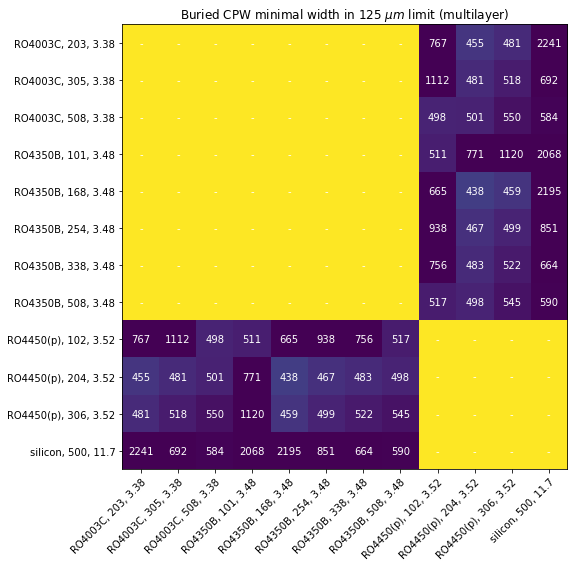

In [15]:
cpw_analyse(materials, b, 125e-6, 350e-6, 1e-3)

# print(work_array)

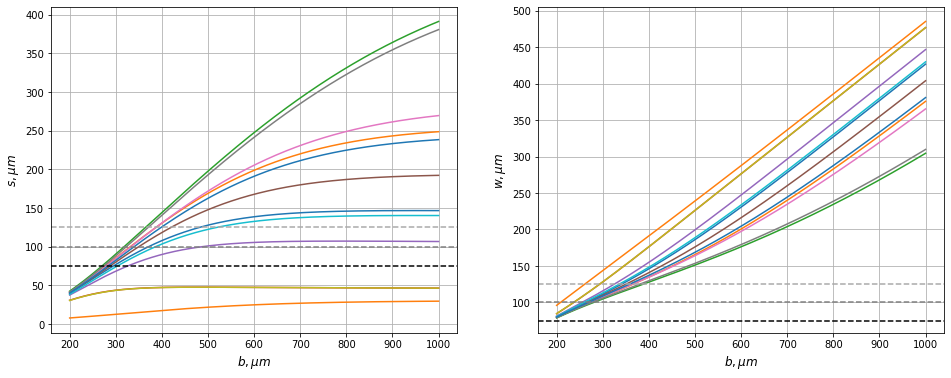

In [8]:
open_cpw_analyse(materials, b)

In [9]:
work_array = materials[0][5:]
open_cpw_analyse(work_array, b, shield_height)

TypeError: unhashable type: 'slice'

In [ ]:
for i in range(0, len(materials[0])):
    if materials[0][i]['metal thikness'] == 18e-6:
        limit = 100e-6
    else:
        limit = 150e-6
    print(limit)
    bw, w_loc = cpw_50_s(limit, materials[0][i]['metal thikness'], materials[0][i]['thikness'], 
                     shield_height, materials[0][i]['eps'], 1, 800e-6)
    bs, s_loc = cpw_50_w(limit, materials[0][i]['metal thikness'], materials[0][i]['thikness'], 
                     shield_height, materials[0][i]['eps'], 1, 800e-6)
    if w_loc < limit and s_loc > limit:
        materials[0][i]['cpw_b_min'] =  bs
    if w_loc > limit and s_loc < limit:
        materials[0][i]['cpw_b_min'] =  bw

print(materials[0])

In [ ]:
work_array = materials[1][:5]
open_cpw_analyse(work_array, b, shield_height)

In [ ]:
work_array = materials[1][5:]
open_cpw_analyse(work_array, b, shield_height)

In [ ]:
for i in range(0, len(materials[1])):
    if materials[1][i]['metal thikness'] == 18e-6:
        limit = 100e-6
    else:
        limit = 150e-6
    print(limit)
    bw, w_loc = cpw_50_s(limit, materials[1][i]['metal thikness'], materials[1][i]['thikness'], 
                     shield_height, materials[1][i]['eps'], 1, 850e-6)
    bs, s_loc = cpw_50_w(limit, materials[1][i]['metal thikness'], materials[1][i]['thikness'], 
                     shield_height, materials[1][i]['eps'], 1, 850e-6)
    if w_loc < limit and s_loc > limit:
        materials[1][i]['cpw_b_min'] =  bs
    if w_loc > limit and s_loc < limit:
        materials[1][i]['cpw_b_min'] =  bw

print(materials[1])

In [ ]:
work_array = np.hstack([materials[2], materials[3], materials[4]])
open_cpw_analyse(work_array, b, shield_height)

In [ ]:
for i in range(0, len(materials[2])):
    if materials[2][i]['metal thikness'] == 18e-6:
        limit = 100e-6
    else:
        limit = 150e-6
    print(limit)
    bw, w_loc = cpw_50_s(limit, materials[2][i]['metal thikness'], materials[2][i]['thikness'], 
                     shield_height, materials[2][i]['eps'], 1, 350e-6)
    bs, s_loc = cpw_50_w(limit, materials[2][i]['metal thikness'], materials[2][i]['thikness'], 
                     shield_height, materials[2][i]['eps'], 1, 350e-6)
    if w_loc < limit and s_loc > limit:
        materials[2][i]['cpw_b_min'] =  bs
    if w_loc > limit and s_loc < limit:
        materials[2][i]['cpw_b_min'] =  bw

print(materials[2])

for i in range(0, len(materials[3])):
    if materials[3][i]['metal thikness'] == 18e-6:
        limit = 100e-6
    else:
        limit = 150e-6
    print(limit)
    bw, w_loc = cpw_50_s(limit, materials[3][i]['metal thikness'], materials[3][i]['thikness'], 
                     shield_height, materials[3][i]['eps'], 1, 300e-6)
    bs, s_loc = cpw_50_w(limit, materials[3][i]['metal thikness'], materials[3][i]['thikness'], 
                     shield_height, materials[3][i]['eps'], 1, 300e-6)
    if w_loc < limit and s_loc > limit:
        materials[3][i]['cpw_b_min'] =  bs
    if w_loc > limit and s_loc < limit:
        materials[3][i]['cpw_b_min'] =  bw

print(materials[3])

for i in range(0, len(materials[4])):
    if materials[4][i]['metal thikness'] == 18e-6:
        limit = 100e-6
    else:
        limit = 150e-6
    print(limit)
    bw, w_loc = cpw_50_s(limit, materials[4][i]['metal thikness'], materials[4][i]['thikness'], 
                     shield_height, materials[4][i]['eps'], 1, 550e-6)
    bs, s_loc = cpw_50_w(limit, materials[4][i]['metal thikness'], materials[4][i]['thikness'], 
                     shield_height, materials[4][i]['eps'], 1, 550e-6)
    if w_loc < limit and s_loc > limit:
        materials[4][i]['cpw_b_min'] =  bs
    if w_loc > limit and s_loc < limit:
        materials[4][i]['cpw_b_min'] =  bw

print(materials[4])

In [ ]:
work_array = materials[5][:]
open_cpw_analyse(work_array, b, shield_height)

In [ ]:
for i in range(0, len(materials[5])):
    if materials[5][i]['metal thikness'] == 18e-6:
        limit = 100e-6
    else:
        limit = 150e-6
    print(limit)
    bw, w_loc = cpw_50_s(limit, materials[5][i]['metal thikness'], materials[5][i]['thikness'], 
                     shield_height, materials[5][i]['eps'], 1, 850e-6)
    bs, s_loc = cpw_50_w(limit, materials[5][i]['metal thikness'], materials[5][i]['thikness'], 
                     shield_height, materials[5][i]['eps'], 1, 850e-6)
    if w_loc < limit and s_loc > limit:
        materials[5][i]['cpw_b_min'] =  bs
    if w_loc > limit and s_loc < limit:
        materials[5][i]['cpw_b_min'] =  bw

print(materials[5])

In [ ]:
work_array = materials[6][:]
open_cpw_analyse(work_array, b, shield_height)

In [ ]:
for i in range(0, len(materials[6])):
    if materials[6][i]['metal thikness'] == 18e-6:
        limit = 100e-6
    else:
        limit = 150e-6
    print(limit)
    bw, w_loc = cpw_50_s(limit, materials[6][i]['metal thikness'], materials[6][i]['thikness'], 
                     shield_height, materials[6][i]['eps'], 1, 850e-6)
    bs, s_loc = cpw_50_w(limit, materials[6][i]['metal thikness'], materials[6][i]['thikness'], 
                     shield_height, materials[6][i]['eps'], 1, 850e-6)
    if w_loc < limit and s_loc > limit:
        materials[6][i]['cpw_b_min'] =  bs
    if w_loc > limit and s_loc < limit:
        materials[6][i]['cpw_b_min'] =  bw

print(materials[6])

In [ ]:
def write_materials_data(materials):
    for work_mass in materials:
        for mat in work_mass:
            print(mat['name'], mat['thikness']*1e6, mat['metal thikness']*1e6, mat['eps'],round(mat['cpw_b_min']*1e6, 1), sep='\t\t')
    

In [ ]:
write_materials_data(materials)